# Analyzing the result of the model error experiment

In [11]:
import os
import json

path = '../../dgym-data/analysis/noise/selection_noise'
files = [
    f'{path}/{file}' for file in os.listdir(path)
    if file.endswith('.json')
]

In [80]:
from tqdm.auto import tqdm

records = []
for file in tqdm(files):
    
    try:
        result = json.load(open(file, 'r'))
    except:
        continue
    result = result[0] if isinstance(result, list) else result
    
    cost = len(pd.DataFrame(result['annotations']).reindex(columns=['Step Tested']).dropna())
    record = {'sigma': result['sigma'], 'cost': cost}

    if 'outcome' in result.keys():
        record.update({'outcome': result['outcome']})
        records.append(record)
    else:
        record.update({'outcome': 0})
        records.append(record)
        
records = pd.DataFrame(records)

  0%|          | 0/1050 [00:00<?, ?it/s]

In [ ]:
sns.scatterplot(
    records.query('sigma == 0.0').sort_values('cost'),
    x='cost', y='outcome'
)

<Axes: xlabel='cost', ylabel='outcome'>

/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mrr/miniconda3/envs/chodera/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sigma', ylabel='outcome'>

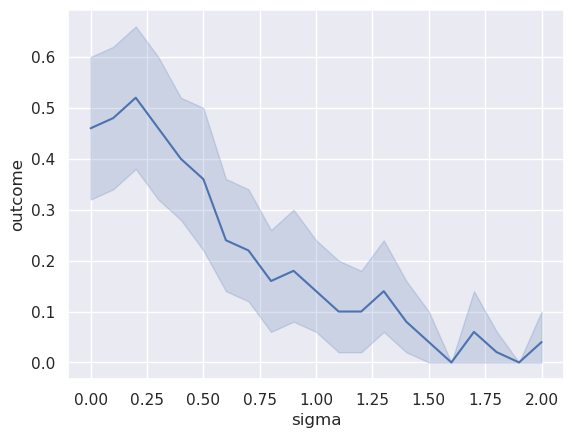

In [98]:
import seaborn as sns

sns.set()
sns.lineplot(records, x='sigma', y='outcome')